# Projeto Escolar 

Este conjunto de dados consiste nas notas obtidas pelos alunos em várias disciplinas. Neste projeto podemos entender a influência dos antecedentes dos pais, preparação para testes etc. no desempenho dos alunos.

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

tabela = pd.read_csv('StudentsPerformance+(1).csv')
display(tabela)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


**Entender os tipos das informações que temos**

In [61]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [62]:
tabela.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [63]:
tabela['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

Assim podemos entender com quantas e quais variáveis estamos lidando em cada coluna

# Análise simples

In [64]:
#Analisando a duplicidade de informações
tabela.duplicated().sum()

0

In [65]:
#Verifica a existencias de NaN
tabela.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [66]:
#Analise estatísica de todas as colunas 
tabela.describe(include = 'all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


Nesta análise podemos ter inúmeras informações: média das notas, nota mínima, nota máxima e qual gênero, etnia, nível de educação dos pais e o tipo de refeição que prevalece em todo banco de dados.

In [67]:
#Porcentagem de gênero
tabela['gender'].value_counts(normalize = True) * 100

female    51.8
male      48.2
Name: gender, dtype: float64

In [68]:
#Porcentagem de gênero
tabela['race/ethnicity'].value_counts(normalize = True) * 100

group C    31.9
group D    26.2
group B    19.0
group E    14.0
group A     8.9
Name: race/ethnicity, dtype: float64

In [69]:
tabela['parental level of education'].value_counts(normalize = True) * 100

some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: parental level of education, dtype: float64

In [70]:
tabela['lunch'].value_counts(normalize = True) * 100

standard        64.5
free/reduced    35.5
Name: lunch, dtype: float64

In [71]:
tabela['test preparation course'].value_counts(normalize = True) * 100

none         64.2
completed    35.8
Name: test preparation course, dtype: float64

**Amplitude total das notas**

A amplitude total de um conjunto de dados é a diferença entre o maior e o menor valor observado.

In [72]:
tabela['math score'].max() - tabela['math score'].min()

100

In [73]:
tabela['reading score'].max() - tabela['reading score'].min()

83

In [74]:
tabela['writing score'].max() - tabela['writing score'].min()

90

**Análise agrupada**

In [110]:
media_gender = tabela.groupby(by ='gender').mean().reset_index()
media_gender


,gender,math score,reading score,writing score
0,female,63.633205,72.608108,72.467181
1,male,68.728216,65.473029,63.311203


Média por gênero 

In [108]:
tabela.groupby(by ='gender').max().reset_index()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group E,some high school,standard,none,100,100,100
1,male,group E,some high school,standard,none,100,100,100


Maiores notas agrupadas por gênero, possibilitando também identificar em qual nível de educação dos pais e etnia se encontra.
Nesse caso temos a maior nota do gênero feminino e masculino = Grupo E; Nível de educação dos pais: Ensino médio e refeição padrão.

In [109]:
tabela.groupby(by ='gender').min().reset_index()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group A,associate's degree,free/reduced,completed,0,17,10
1,male,group A,associate's degree,free/reduced,completed,27,23,15


Menores notas agrupadas por gênero, possibilitando também identificar em qual nível de educação dos pais e etnia se encontra. 
Nesse caso temos a menor nota do gênero feminino e masculino = Grupo A; Nível de educação dos pais: associate's degree e tem refeição reduzida. 

**Notas em ordem decrescente**

In [78]:
#Tabela de notas em ordem decrescente 
tabela_notas = tabela.sort_values(['math score', 'reading score','writing score'], ascending = False)
tabela_notas

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
458,female,group E,bachelor's degree,standard,none,100,100,100
916,male,group E,bachelor's degree,standard,completed,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100
149,male,group E,associate's degree,free/reduced,completed,100,100,93
625,male,group D,some college,standard,completed,100,97,99
...,...,...,...,...,...,...,...,...
145,female,group C,some college,free/reduced,none,22,39,33
787,female,group B,some college,standard,none,19,38,32
17,female,group B,some high school,free/reduced,none,18,32,28
980,female,group B,high school,free/reduced,none,8,24,23


In [79]:
#Analisando as 5 maiores notas 
tabela_notas.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
458,female,group E,bachelor's degree,standard,none,100,100,100
916,male,group E,bachelor's degree,standard,completed,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100
149,male,group E,associate's degree,free/reduced,completed,100,100,93
625,male,group D,some college,standard,completed,100,97,99


In [80]:
#Analisando as 5 menores notas
tabela_notas.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
145,female,group C,some college,free/reduced,none,22,39,33
787,female,group B,some college,standard,none,19,38,32
17,female,group B,some high school,free/reduced,none,18,32,28
980,female,group B,high school,free/reduced,none,8,24,23
59,female,group C,some high school,free/reduced,none,0,17,10


# Análise gráfica

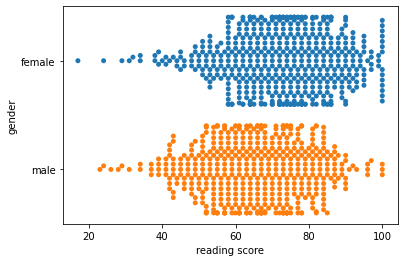

In [81]:
sns.swarmplot(data = tabela, x= 'reading score', y='gender');

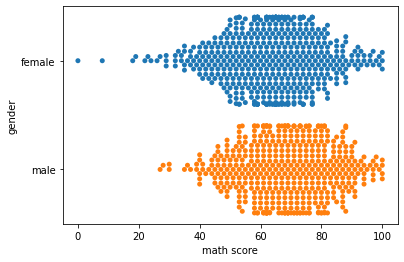

In [82]:
sns.swarmplot(data = tabela, x= 'math score', y='gender');

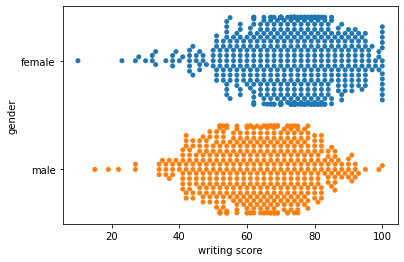

In [83]:
sns.swarmplot(data = tabela, x= 'writing score', y='gender');

Com esses gráficos podemos fazer uma interposição das notas com o gênero e aqui vemos que nas disciplinas "reading" e "writing" o gênero feminino apresenta maior quantidade nas notas mais altas. Já na disciplina "math" o gráfico fica mais equilibrado, mas ainda é possível observar que as notas abaixo de 20 pertencem ao gênero feminino.

**Média por gênero - Análise Gráfica**

Podemos também ver essa análise das notas através das médias das disciplinas por gênero, que acaba nos trazendo o mesmo resultado e deixando mais claro que a discplina 'math' o gênero masculino obtém uma média maior das notas.

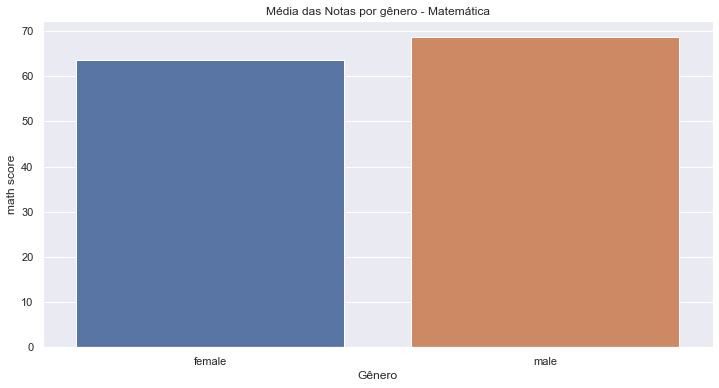

In [116]:
sns.set()
plt.figure(figsize=(12,6))
grafico = sns.barplot(data=media_gender, x="gender", y="math score")
grafico.set_xticklabels(grafico.get_xticklabels())
grafico.set_title("Média das Notas por gênero - Matemática")
plt.xlabel("Gênero")


plt.show()

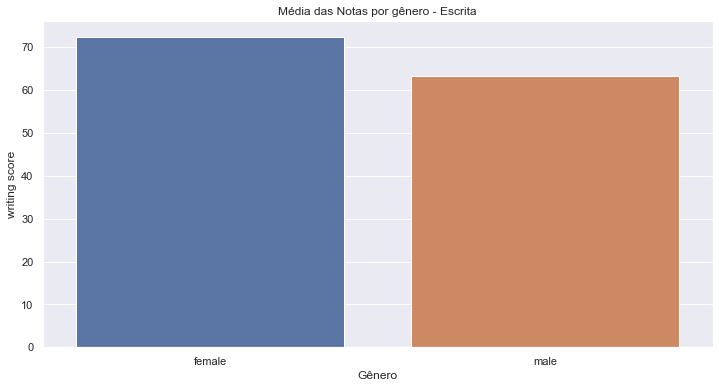

In [123]:
sns.set()
plt.figure(figsize=(12,6))
grafico = sns.barplot(data=media_gender, x="gender", y="writing score")
grafico.set_xticklabels(grafico.get_xticklabels())
grafico.set_title("Média das Notas por gênero - Escrita")
plt.xlabel("Gênero")


plt.show()

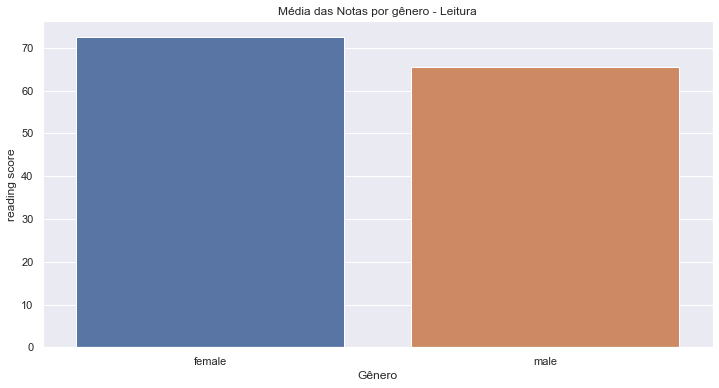

In [122]:
sns.set()
plt.figure(figsize=(12,6))
grafico = sns.barplot(data=media_gender, x="gender", y="reading score")
grafico.set_xticklabels(grafico.get_xticklabels())
grafico.set_title("Média das Notas por gênero - Leitura")
plt.xlabel("Gênero")


plt.show()

**Análise das Médias por nível de educação dos pais**

In [131]:
level_education = tabela.groupby(by ='parental level of education').mean().reset_index()
level_education 

,parental level of education,math score,reading score,writing score
0,associate's degree,67.882883,70.927928,69.896396
1,bachelor's degree,69.389831,73.000000,73.381356
2,high school,62.137755,64.704082,62.448980
3,master's degree,69.745763,75.372881,75.677966
4,some college,67.128319,69.460177,68.840708
5,some high school,63.497207,66.938547,64.888268


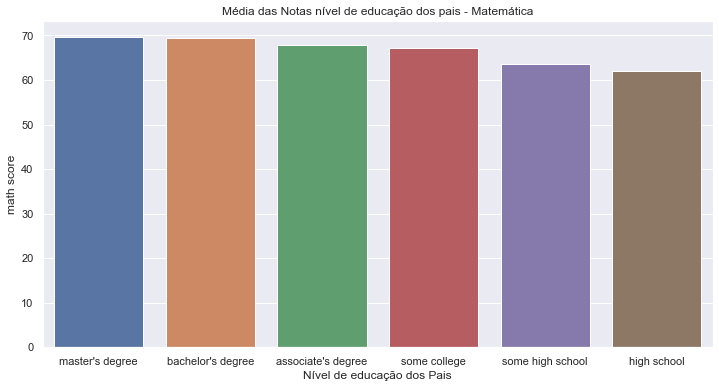

In [132]:
sns.set()
plt.figure(figsize=(12,6))
grafico = sns.barplot(data=level_education.sort_values('math score', ascending =False), x="parental level of education", y="math score")
grafico.set_title("Média das Notas nível de educação dos pais - Matemática")
plt.xlabel("Nível de educação dos Pais")


plt.show()

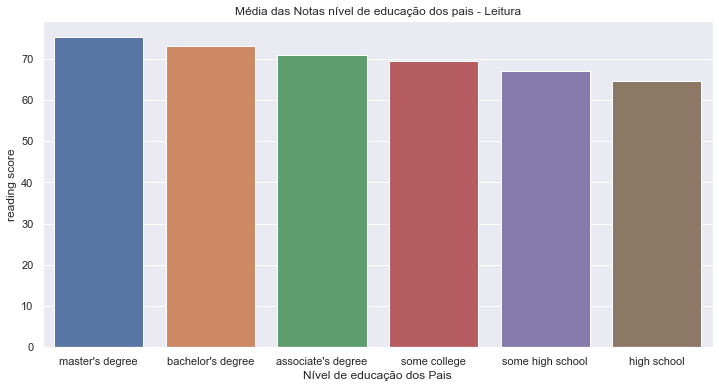

In [133]:
sns.set()
plt.figure(figsize=(12,6))
grafico = sns.barplot(data=level_education.sort_values('reading score', ascending =False), x="parental level of education", 
                      y="reading score")
grafico.set_title("Média das Notas nível de educação dos pais - Leitura")
plt.xlabel("Nível de educação dos Pais")


plt.show()

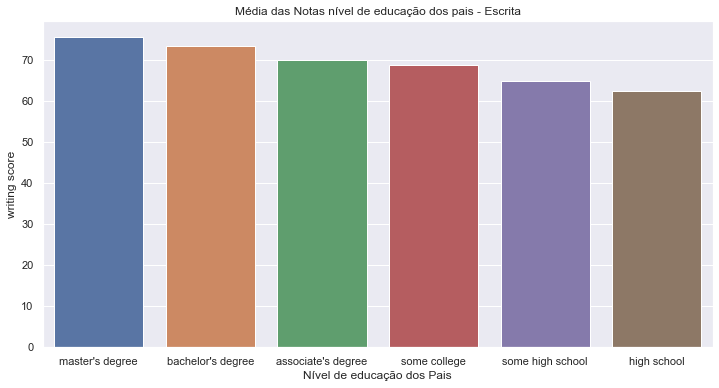

In [134]:
sns.set()
plt.figure(figsize=(12,6))
grafico = sns.barplot(data=level_education.sort_values('writing score', ascending =False), x="parental level of education", 
                      y="writing score")
grafico.set_title("Média das Notas nível de educação dos pais - Escrita")
plt.xlabel("Nível de educação dos Pais")


plt.show()

Com essa análise podemos perceber que o nível de educação dos pais influencia no rendimento escolar dos filhos.